## Data understanding and preparation

 Before any analysis we strive to understand how the data is organised in the various datasets. The steps highlighted below helps to understand the datasets provided and as well as to clean them.

## 1. Dataset = bom.movie_gross.csv'

In [112]:
#importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [113]:
# Reading the data
movies_gross=pd.read_csv('data/bom.movie_gross.csv')
movies_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [114]:
# it displays the number of rows and columns in the dataset
movies_gross.shape

(3387, 5)

In [115]:
#info for overview of the dataset(it gives a condensed summary of the dataset)
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


 From the above cell we find that the column title has 3387 rows of entries while studio has 3382 to mean that 5 entries from  the colunm title dont have studios where they we produced

In [116]:
# checking for miss values
movies_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [54]:
# describe for descriptive statistics

movies_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [55]:
#check for duplicates
duplicates=movies_gross.duplicated().sum()
duplicates

0

In [56]:
"""The studio contains 5 missing values. The entire dataset only contains around 3387 rows of 
data. In this case, it makes more sense to just remove the studio column from the dataset entirely.
we cannot drop the foreign_gross because if we dropped this column,we would be throwing out all that 
information just to deal with a small subset of missing values and my not give a true value of the dataset
set studio because it does not have a huge impact on the dataset"""

movies_gross=movies_gross.dropna(subset=["studio"])
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


#we are using the built in function to see the number of Null value in the database
movies_gross.isnull().sum()

In [57]:
#change foreign _gross to int
"""we use the to_numeric approach to change the foreign_gross from an object to a float"""
movies_gross['foreign_gross'] = movies_gross['foreign_gross'].str.replace(',','')
movies_gross['foreign_gross'] = movies_gross['foreign_gross'].astype(float)
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


<ipython-input-57-f48f19cdec15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_gross['foreign_gross'] = movies_gross['foreign_gross'].str.replace(',','')
<ipython-input-57-f48f19cdec15>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_gross['foreign_gross'] = movies_gross['foreign_gross'].astype(float)


In [58]:
movies_gross=movies_gross.dropna(subset=["domestic_gross"])
movies_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


In [59]:
movies_gross['foreign_gross']

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3356, dtype: float64

## 2. Dataset = movies_budgets.csv

In [144]:
#importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [150]:
# Reading the data
movies_gross=pd.read_csv('data/tn.movie_budgets.csv', index_col=0)
movies_gross

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [146]:
type(movies_gross)

pandas.core.frame.DataFrame

It shows what is in the dataset the first five columns and rows

In [147]:
movies_gross.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


It shows what is in the dataset the last five columns and rows

In [148]:
movies_gross.tail()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


From these particular dataset the item of interest is-
is there a direct relationship between the production_budget and world wide-gross sales of the movies?
this question informs how we will clean our dataset for analysis.

In [151]:
#list of colunm to remove$ sign
col_to_clean = ['production_budget','domestic_gross','worldwide_gross']
#loop through each column in cols_to_clean and replace the $ sign with an empty string
for col in col_to_clean:
    movies_gross[col]=movies_gross[col].str.replace('$','')
# save the cleaned Dataframe to a new csv file
movies_gross.to_csv('cleaned_csv_file.csv', index=False)
movies_gross

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"7,000",0,0
79,"Apr 2, 1999",Following,"6,000","48,482","240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"5,000","1,338","1,338"


In [153]:
#list of colunm to remove, sign
col_to_clean = ['production_budget','domestic_gross','worldwide_gross']
#loop through each column in cols_to_clean and replace the $ sign with an empty string
for col in col_to_clean:
    movies_gross[col]=movies_gross[col].str.replace(',','')
# save the cleaned Dataframe to a new csv file
movies_gross.to_csv('cleaned_csv_file.csv', index=False)
movies_gross

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000,0,0
79,"Apr 2, 1999",Following,6000,48482,240495
80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [158]:
# creating a copy of the cleaned csv file

df1=pd.read_csv("cleaned_csv_file.csv")
df1

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,0
5778,"Apr 2, 1999",Following,6000,48482,240495
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [159]:
# shows the rows and column present in the dataset
df1.shape

(5782, 5)

In [162]:
# describe for descriptive statistics
df1.describe()

,production_budget,domestic_gross,worldwide_gross
count,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07
std,4.181208e+07,6.824060e+07,1.747200e+08
min,1.100000e+03,0.000000e+00,0.000000e+00
25%,5.000000e+06,1.429534e+06,4.125415e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07
75%,4.000000e+07,5.234866e+07,9.764584e+07
max,4.250000e+08,9.366622e+08,2.776345e+09


In [166]:
#  checking for the null value count for each column
df1.isnull().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [167]:
#unique count column movies_gross
df1.nunique()

release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
dtype: int64

In [168]:
#check for duplicates
df1.duplicated().sum()

0

Sorting the dataset

In [190]:
df1.sort_values(by='production_budget', ascending =False)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,553.257713
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636
...,...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,0,-100.000000
5778,"Apr 2, 1999",Following,6000,48482,240495,3908.250000
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-73.240000
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-100.000000


In [169]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 226.0+ KB


In [195]:
# convert numeric columns to numeric type
df1['production_budget'] = pd.to_numeric(df1['production_budget'])
df1['domestic_gross'] = pd.to_numeric(df1['domestic_gross'])
df1['worldwide_gross'] = pd.to_numeric(df1['worldwide_gross'])

#calculate ROI and add it as a new column
df1['ROI'] = ((df1['worldwide_gross'] - df1['production_budget']) / df1['production_budget'])*100

#save the updated dataframe to a csv file
df1.to_csv("movies_with_ROI.csv", index=False)
df1


,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,553.257713
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636
...,...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,0,-100.000000
5778,"Apr 2, 1999",Following,6000,48482,240495,3908.250000
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-73.240000
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-100.000000


sum is the total number of all the columns data
count  is the number of entries or rows in a column.

In [201]:
df1.production_budget.agg(['sum','count','mean', 'std','median']).head()

sum       1.826404e+11
count     5.782000e+03
mean      3.158776e+07
std       4.181208e+07
median    1.700000e+07
Name: production_budget, dtype: float64

In [202]:
df1.worldwide_gross.agg(['sum','count','mean', 'std','median']).head()

sum       5.289805e+11
count     5.782000e+03
mean      9.148746e+07
std       1.747200e+08
median    2.798445e+07
Name: worldwide_gross, dtype: float64

In [232]:
df1.domestic_gross.agg(['sum','count','mean', 'std','median']).head()

sum       1.708136e+10
count     5.000000e+01
mean      3.416272e+08
std       2.062369e+08
median    2.965674e+08
Name: domestic_gross, dtype: float64

visualizing the dataset

In [216]:
import matplotlib.pyplot as plt
import pandas as pd

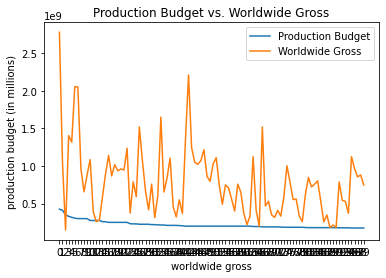

In [225]:
# Load the CSV file into a pandas DataFrame, limiting to first 1000 rows
df1=pd.read_csv("cleaned_csv_file.csv", nrows=100)

# Create a scatter plot using Matplotlib
plt.plot(df1.index, df1['production_budget'], label='Production Budget')
plt.plot(df1.index, df1['worldwide_gross'], label='Worldwide Gross')

# Set the x-axis ticks and labels
plt.xticks(df1.index, df1.index)

# Set the title and axis labels
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('worldwide gross')
plt.ylabel('production budget (in millions)')

# Add a legend
plt.legend()

# Display the chart
plt.show()

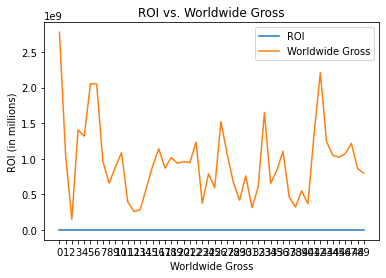

In [230]:
df1=pd.read_csv("movies_with_ROI.csv", nrows=50)
# Create a line chart using Matplotlib
plt.plot(df1.index, df1['ROI'], label='ROI')
plt.plot(df1.index, df1['worldwide_gross'], label='Worldwide Gross')

# Set the x-axis ticks and labels
plt.xticks(df1.index, df1.index)

# Set the title and axis labels
plt.title('ROI vs. Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('ROI (in millions)')

# Add a legend
plt.legend()
# Display the chart
plt.show()

## 3. DATASET = tmdb.movies.csv

In [235]:
# Reading the data
df3=pd.read_csv('data/tmdb.movies.csv')
df3

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Data preprocessing  to understand the shape and arrangement of the dataset

In [251]:
#sorting by popularity to see which movie is popular
df3.sort_values(by='popularity', ascending =False).head(10)


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


In [259]:
df3.sort_values(by='release_date', ascending =False).tail(10)


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
24268,24268,"[14, 18]",490,sv,Det sjunde inseglet,8.693,1958-10-13,The Seventh Seal,8.2,1163,1958
24621,24621,"[18, 10749]",35861,ja,近松物語,5.754,1958-01-01,The Crucified Lovers,7.9,40,1958
24211,24211,[18],614,sv,Smultronstället,9.381,1957-12-26,Wild Strawberries,8.1,595,1957
120,120,[878],830,en,Forbidden Planet,10.274,1956-03-15,Forbidden Planet,7.3,388,1956
14740,14740,"[18, 53]",43397,en,Caught,5.439,1949-02-17,Caught,6.5,31,1949
11192,11192,"[18, 36, 10749]",887,en,The Best Years of Our Lives,9.647,1946-12-25,The Best Years of Our Lives,7.8,243,1946
26345,26345,[],316707,en,How Walt Disney Cartoons Are Made,0.600,1939-01-19,How Walt Disney Cartoons Are Made,7.3,3,1939
3580,3580,"[35, 18, 10749]",263768,fr,Le Bonheur,1.653,1936-02-27,Le Bonheur,8.7,3,1936
21758,21758,"[27, 53]",43148,en,The Vampire Bat,2.292,1933-01-21,The Vampire Bat,5.6,23,1933
14335,14335,"[18, 10752]",143,en,All Quiet on the Western Front,9.583,1930-04-29,All Quiet on the Western Front,7.8,299,1930


In [240]:
#checking for duplicates
df3.duplicated().sum()

0

In [242]:
#checking for missing data
df3.isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [244]:
#unique count column 
df3.nunique()

Unnamed: 0           26517
genre_ids             2477
id                   25497
original_language       76
original_title       24835
popularity            7425
release_date          3433
title                24688
vote_average            91
vote_count            1693
dtype: int64

In [245]:

df3.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [246]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


How many movies were released in each year and what was there production budget?

In [266]:
# extract the year from the release_date column
df3['year'] = pd.DatetimeIndex(df3['release_date']).year

# group the data by year and count the number of movies produced each year
movies_per_year = df3.groupby('year').size()

# print the result
movies_per_year

year
1930       1
1933       1
1936       1
1939       1
1946       1
        ... 
2016    3192
2017    3145
2018    2587
2019      63
2020       1
Length: 66, dtype: int64

In [267]:
df3.shape

(26517, 11)

In [264]:
# read the csv files
df1=pd.read_csv("cleaned_csv_file.csv")

# convert the release_date column in both data frames to datetime format
df1['release_date'] = pd.to_datetime(df1['release_date'])
df3['release_date'] = pd.to_datetime(df3['release_date'])

# extract the year from the release_date column in both data frames
df1['year'] = df1['release_date'].dt.year
df3['year'] = df3['release_date'].dt.year

# merge the two data frames on the year and movie columns
merged_df = pd.merge(df1, df3, how='inner', left_on=['year', 'movie'], right_on=['year', 'title'])

# group the data by year and sum the production_budget column
budget_by_year = merged_df.groupby('year')['production_budget'].sum()

# group the data by year and count the number of movies released each year
movies_by_year = merged_df.groupby('year').size()

# create a new data frame with the two series
result = pd.concat([budget_by_year, movies_by_year], axis=1)
result.columns = ['production_budget', 'num_movies']

# print the result
print(result)


      production_budget  num_movies
year                               
1946            2100000           1
1968           10500000           1
1976            1800000           1
1977           20000000           1
1979           32000000           1
1980           33500000           2
1982           45500000           4
1984           45000000           2
1985            1500000           1
1986           83800000           4
1988           43000000           3
1991          200000000           2
1992            8000000           1
1994           79300000           1
1995          205000000           6
1996           75000000           2
1997          205000000           3
1998          185000000           2
1999          192000000           3
2000           91000000           2
2001           40000000           1
2002          110000000           2
2004          421200000           5
2005           22000000           1
2006           79000000           2
2007          130000000     

 the year 2009 to2019 there was an upward trend in the number of movies produced,

in 2019they were four movies that had similar title in both the df3 and df1 and there production budget was 55660000

## 4. DATASET = rt.reviews.tsv

In [277]:
# Reading the data
df4=pd.read_csv('data/rt.reviews.tsv',sep='\t', encoding='latin-1')
df4

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


sorting

Data preprocessing  to understand the shape and arrangement of the dataset

In [279]:
df4.sort_values(by='top_critic', ascending =False)

,id,review,rating,fresh,critic,top_critic,publisher,date
9798,376,The movie doesn't really want to be all that h...,2/4,rotten,Roger Ebert,1,At the Movies,"January 1, 2000"
45456,1704,"Cumberbatch nails it. If only the film did, too.",4/5,fresh,Bill Goodykoontz,1,Arizona Republic,"December 11, 2014"
45454,1704,The actors save the day.,3/4,fresh,Michael Phillips,1,Chicago Tribune,"December 11, 2014"
45453,1704,"The Imitation Game"" leaves Turing's essential ...",3/4,fresh,Ann Hornaday,1,Washington Post,"December 11, 2014"
45452,1704,This watchable biopic focuses on the Enigma pr...,NaN,fresh,J. R. Jones,1,Chicago Reader,"December 11, 2014"
...,...,...,...,...,...,...,...,...
20620,830,"clever, consistently funny and unexpectedly po...",4/5,fresh,James Sanford,0,Kalamazoo Gazette,"July 29, 2002"
20625,830,The Wedding Banquet wins fans with its sunny d...,3.5/5,fresh,Marjorie Baumgarten,0,Austin Chronicle,"January 1, 2000"
20626,830,I just never found myself caring quite enough.,5/10,rotten,Scott Renshaw,0,rec.arts.movies.reviews,"January 1, 2000"
20627,830,"This is an enjoyable film, though perhaps not ...",NaN,fresh,Mark R. Leeper,0,rec.arts.movies.reviews,"January 1, 2000"


In [282]:
df4.duplicated().sum()

9

In [294]:
df4.shape

(54432, 8)

In [295]:
df4.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [296]:
df4.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [284]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [297]:
#numerical data descriptive analysis
df4.descr

,id,top_critic
count,54432.000000,54432.000000
mean,1045.706882,0.240594
std,586.657046,0.427448
min,3.000000,0.000000
25%,542.000000,0.000000
50%,1083.000000,0.000000
75%,1541.000000,0.000000
max,2000.000000,1.000000


In [298]:
#unique count colunm
df4.nunique()

id             1135
review        48682
rating          186
fresh             2
critic         3496
top_critic        2
publisher      1281
date           5963
dtype: int64

In [306]:
#to get null value count for each column
df4.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [321]:
#drop the NAN colunm
df4 = df4.dropna()
df4

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"While not one of Cronenberg's stronger films, ...",B-,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013"
...,...,...,...,...,...,...,...,...
54419,2000,"Sleek, shallow, but frequently amusing.",2.5/4,fresh,Gene Seymour,1,Newsday,"September 27, 2002"
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,"September 27, 2002"
54421,2000,"Manages to be somewhat well-acted, not badly a...",1.5/4,rotten,Bob Strauss,0,Los Angeles Daily News,"September 27, 2002"
54422,2000,Arguably the best script that Besson has writt...,3.5/5,fresh,Wade Major,0,Boxoffice Magazine,"September 27, 2002"


 ## 5. DATASET =  rt.movie_info.tsv

In [323]:
df5=pd.read_csv('data/rt.movie_info.tsv',sep='\t', encoding='latin-1')
df5


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [326]:
df5.duplicated().sum()

0

In [329]:
df5.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [332]:
df5=df5.dropna()
df5

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,"72,700,000",126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,"1,320,005",123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment


In [334]:
df5.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


In [335]:
df5.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,"72,700,000",126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,"1,320,005",123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,"59,371",98 minutes,IDP Distribution


In [336]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            235 non-null    int64 
 1   synopsis      235 non-null    object
 2   rating        235 non-null    object
 3   genre         235 non-null    object
 4   director      235 non-null    object
 5   writer        235 non-null    object
 6   theater_date  235 non-null    object
 7   dvd_date      235 non-null    object
 8   currency      235 non-null    object
 9   box_office    235 non-null    object
 10  runtime       235 non-null    object
 11  studio        235 non-null    object
dtypes: int64(1), object(11)
memory usage: 23.9+ KB


In [343]:
df5.sort_values(by='genre', ascending =True)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
271,357,Planet 51 is a galactic-sized animated alien a...,PG,Action and Adventure|Animation|Comedy|Kids and...,Jorge Blanco,Joe Stillman,"Nov 20, 2009","Mar 9, 2010",$,"42,194,060",91 minutes,Sony Pictures/TriStar Pictures
633,816,Two mismatched wolves embark on a cross-countr...,PG,Action and Adventure|Animation|Comedy|Kids and...,Anthony Bell|Ben Gluck|Benjamin Gluck,Steve Moore|Chris Denk,"Sep 17, 2010","Jan 11, 2011",$,"25,077,977",88 minutes,Lionsgate Films
370,482,"Take out the trash, eat your broccoli-who need...",PG,Action and Adventure|Animation|Comedy|Science ...,Simon Wells,Simon Wells|Wendy Wells,"Mar 11, 2011","Aug 9, 2011",$,"21,379,315",88 minutes,Walt Disney Pictures
1238,1601,Rango is a sheltered chameleon living as an or...,PG,Action and Adventure|Animation|Kids and Family,Gore Verbinski,John Logan,"Mar 4, 2011","Jul 15, 2011",$,"123,188,232",107 minutes,Paramount Pictures
1145,1475,"A young robot with incredible powers, super st...",PG,Action and Adventure|Animation|Kids and Family...,David Bowers,Timothy Hyde Harris|David Bowers|Timothy Harris,"Oct 23, 2009","Mar 16, 2010",$,"19,548,064",94 minutes,Summit Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...
524,686,Set in a dystopic present where vigilant gargo...,PG-13,Horror|Mystery and Suspense|Science Fiction an...,Stuart Beattie,Stuart Beattie,"Jan 24, 2014","May 13, 2014",$,"15,687,400",92 minutes,Lionsgate Films
479,626,Popular bogeymen Jason Voorhees terrorizes a g...,R,Horror|Mystery and Suspense|Science Fiction an...,James Isaac,Todd Farmer,"Apr 26, 2002","Jun 1, 2004",$,"12,610,731",91 minutes,New Line Cinema
1208,1554,The movie chronicles the adventures of a young...,G,Kids and Family|Musical and Performing Arts,Britt Allcroft,Britt Allcroft,"Jul 26, 2000","Oct 31, 2000",$,"2,027,042",95 minutes,Destination Films
1117,1442,Youthful wizard Harry Potter returns to the sc...,PG,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,"Nov 15, 2002","Apr 11, 2003",$,"261,835,892",161 minutes,Warner Bros. Pictures


In [344]:
df5.nunique()

id              235
synopsis        235
rating            6
genre            76
director        217
writer          232
theater_date    209
dvd_date        210
currency          1
box_office      235
runtime          69
studio          101
dtype: int64

 there are 76 unique genre in the dataset above

In [351]:
# count the occurrences of each unique value in the column
value_counts = df5['genre'].value_counts()

# select the value(s) with the highest occurrence
highest_occurrence = value_counts.idxmax()

# count the total number of occurrences of the highest occurring value
total_count = value_counts[highest_occurrence]

print("Total number of highest occurring values:", total_count)

Total number of highest occurring values: 33


In [352]:
df5


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,"72,700,000",126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,"1,320,005",123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment


## 6. DATASET =  im.db

In [363]:
import sqlite3
import pandas as pd

In [371]:
conn = sqlite3.connect('data/im.db')


In [374]:
df6 = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df6

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


From the question provided we were told to focus on movie_basic and movie_rating to get our analysis.
this means we have to read the database using sqlite and then use the pandas read_sql function to get a dataframe object called df7.

In [378]:
df7=pd.read_sql("SELECT * FROM movie_basics;", conn)
df7

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


understanding the dataset

In [379]:
df7.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


 from the above dataset the observation is the primary title and original title are slightly different in some rows.
    the above table has six columns 

In [380]:
df7.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [381]:
df7.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [382]:
df7.shape

(146144, 6)

observation of the table above shows that the data set has 146144 rows and 6columns hence gives a better analyze of the data

In [384]:
df7.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

 the table above indicates that the runtime minutes and genres has alot of missing values/entries

In [385]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


it shows the data type it has, the number of objects and intergers in the data

In [387]:
df7.duplicated().sum()

0

the observation shows there are no duplicate in the dataframe 

In [389]:
df7.nunique()

movie_id           146144
primary_title      136071
original_title     137773
start_year             19
runtime_minutes       367
genres               1085
dtype: int64

In [393]:
df8.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [ ]:
is there a relationship between the averagerating and number of votes

In [394]:
df8.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [395]:
df8.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [397]:
df8.shape

(73856, 3)

In [406]:
df8.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [401]:
df8.duplicated().sum()

0

In [ ]:
they are no duplicates values

In [404]:
df8.nunique()

movie_id         73856
averagerating       91
numvotes          7349
dtype: int64

the dataset shows that numvotes has 7349 unique movies and it also has unique movie ids

In [407]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


it shows the data type is float, interger,object

# DATA ANALYSIS


## 1. From the data understanding and preparation the business question we are trying to answer is which movie genre has the highest worldwide_gross sales

In [409]:
# read in the two dataframes
df1=pd.read_csv("cleaned_csv_file.csv")

# merge the dataframes on movie and primary_title columns
merged_df = pd.merge(df7[['movie_id', 'primary_title', 'genres']], df1[['movie', 'worldwide_gross']], 
                     left_on='primary_title', right_on='movie')

# group the merged dataframe by genres and aggregate the worldwide_gross column by sum
genre_gross_df = merged_df.groupby('genres')['worldwide_gross'].sum().reset_index()

# sort the genre_gross dataframe in descending order of worldwide_gross
genre_gross_df = genre_gross_df.sort_values(by='worldwide_gross', ascending=False)

print(genre_gross_df)

                         genres  worldwide_gross
14      Action,Adventure,Sci-Fi      34749552015
79   Adventure,Animation,Comedy      27486160147
255                       Drama      21284849192
231                 Documentary      17430057076
9      Action,Adventure,Fantasy      14024491016
..                          ...              ...
246          Documentary,Horror                0
321              Horror,Musical                0
310               Family,Sci-Fi                0
251  Documentary,Sport,Thriller                0
150   Biography,Documentary,War                0

[345 rows x 2 columns]


In [410]:
genre_gross_df.head()

,genres,worldwide_gross
14,"Action,Adventure,Sci-Fi",34749552015
79,"Adventure,Animation,Comedy",27486160147
255,Drama,21284849192
231,Documentary,17430057076
9,"Action,Adventure,Fantasy",14024491016


From the above we can recommend that new microsoft studio can invest in the following genres;
    1. Action,Adventure,Sci-Fi
    2.Adventure,Animation,Comedy
    3.Drama
    4.Documentary,
    5. Action,Adventure,Fantasy
because they have avery high worldwide_gross sales as evidence from the data analysis done in the cell above


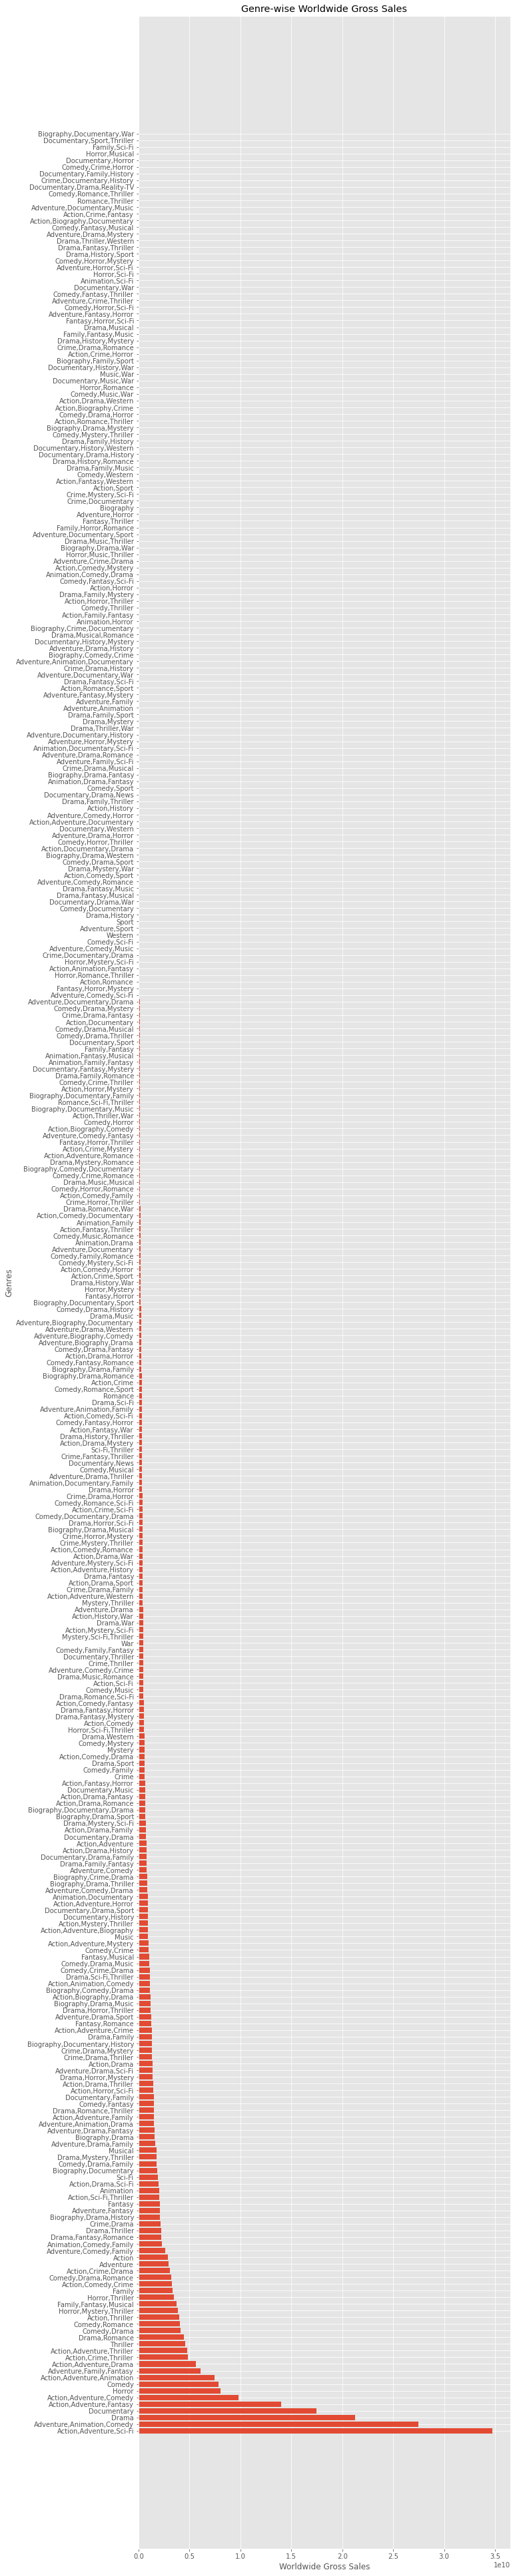

In [415]:
import matplotlib.pyplot as plt

# set the plot style
plt.style.use('ggplot')

# create the plot
fig, ax = plt.subplots(figsize=(10, 70))
ax.barh(genre_gross_df['genres'], genre_gross_df['worldwide_gross'])
ax.set_xlabel('Worldwide Gross Sales')
ax.set_ylabel('Genres')
ax.set_title('Genre-wise Worldwide Gross Sales')

plt.show()

it is a sorted from ascending order, and shows the one that the genre is the best option to 
invest in cause it has the highest sales

## 2. From the data understanding and preparation the business question we are trying to answer is does popularity make domestic_gross sales of movies  increase?

In [417]:
merged_df = pd.merge(df3[['title', 'popularity']], df1[['movie', 'domestic_gross']], left_on='title',
                     right_on='movie', how='inner')
merged_df

,title,popularity,movie,domestic_gross
0,How to Train Your Dragon,28.734,How to Train Your Dragon,217581232
1,Iron Man 2,28.515,Iron Man 2,312433331
2,Toy Story,28.005,Toy Story,191796233
3,Toy Story,28.005,Toy Story,191796233
4,Inception,27.920,Inception,292576195
...,...,...,...,...
2380,The Box,0.600,The Box,15051977
2381,The Box,0.600,The Box,15051977
2382,Enough,0.719,Enough,39177215
2383,Undiscovered,0.600,Undiscovered,1069318


In [420]:
merged_df.head(100)

,title,popularity,movie,domestic_gross
0,How to Train Your Dragon,28.734,How to Train Your Dragon,217581232
1,Iron Man 2,28.515,Iron Man 2,312433331
2,Toy Story,28.005,Toy Story,191796233
3,Toy Story,28.005,Toy Story,191796233
4,Inception,27.920,Inception,292576195
...,...,...,...,...
95,Cats & Dogs: The Revenge of Kitty Galore,10.544,Cats & Dogs: The Revenge of Kitty Galore,43585753
96,The Fighter,10.395,The Fighter,93617009
97,The Tourist,10.307,The Tourist,67631157
98,Killers,10.221,Killers,47059963


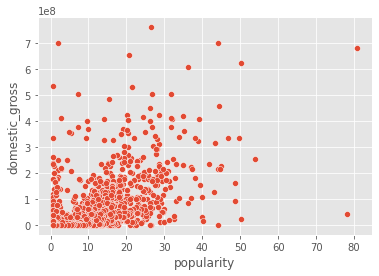

In [421]:
import seaborn as sns

# create the scatter plot
sns.scatterplot(x=merged_df['popularity'], y=merged_df['domestic_gross'])

plt.show()

In [422]:
correlation = merged_df['popularity'].corr(merged_df['domestic_gross'])
print('Correlation between popularity and domestic gross:', correlation)


Correlation between popularity and domestic gross: 0.5360018432725122


From the results above the correlation coefficient is approximately 0.53, even though it is positive the value is not 
close to one meaning as popularity increases there is no direct increase to the domestic_gross sales. 
from these i recommend that microsoft new movies studios focus on intensive marketing so as to boost there popularity
which in turn create a +1 correlation between popularity and domestic gross. 

## 3. From the data understanding and preparation the business question we are trying to answer is does runtime in minutes of movie title have an impact on worldwide_gross

In [423]:
# merge the two dataframes on the 'movie' and 'original_title' columns
merged_df = pd.merge(df7, df1, left_on='original_title', right_on='movie')

# select only the columns you need
merged_df = merged_df[['original_title', 'runtime_minutes', 'domestic_gross', 'worldwide_gross']]

# check for null values
merged_df.isnull().sum()

# fill in null values with 0
merged_df = merged_df.fillna(0)

# calculate correlation between runtime_minutes and worldwide_gross
corr = merged_df['runtime_minutes'].corr(merged_df['worldwide_gross'])
print(corr)

0.14336738851372544


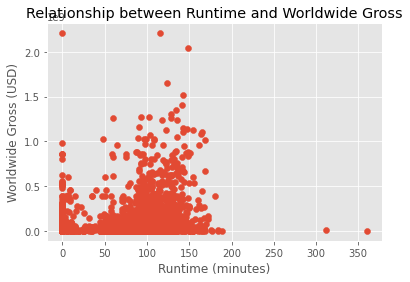

In [424]:
import matplotlib.pyplot as plt

# plot a scatter plot of runtime_minutes vs worldwide_gross
plt.scatter(merged_df['runtime_minutes'], merged_df['worldwide_gross'])
plt.xlabel('Runtime (minutes)')
plt.ylabel('Worldwide Gross (USD)')
plt.title('Relationship between Runtime and Worldwide Gross')
plt.show()

because the correlation is too low,the runtime has minimal or no impact on sales hence no need to give recommendations


In [438]:
# read in the one dataframes
df0=pd.read_csv("movies_with_ROI.csv")
df0

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,553.257713
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636
...,...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,7000,0,0,-100.000000
5778,"Apr 2, 1999",Following,6000,48482,240495,3908.250000
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-73.240000
5780,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-100.000000


## 4.From the data understanding and preparation, the business question we are trying to answer is to find the Return on investment(ROI) for several genres across the years.

In [461]:
# merge the data frames on the 'movie' and 'original_title' columns
merged_df = pd.merge(df0[['movie','release_date' ,'ROI']], 
                     df7[['original_title', 'genres']],
                     left_on='movie', right_on='original_title',
                     how='inner')
merged_df

,movie,release_date,ROI,original_title,genres
0,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",154.667286,Pirates of the Caribbean: On Stranger Tides,"Action,Adventure,Fantasy"
1,Dark Phoenix,"Jun 7, 2019",-57.210757,Dark Phoenix,"Action,Adventure,Sci-Fi"
2,Avengers: Age of Ultron,"May 1, 2015",324.384139,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi"
3,Avengers: Infinity War,"Apr 27, 2018",582.711400,Avengers: Infinity War,"Action,Adventure,Sci-Fi"
4,Justice League,"Nov 17, 2017",118.648403,Justice League,"Action,Adventure,Fantasy"
...,...,...,...,...,...
3532,Cure,"Jul 6, 2001",845.960000,Cure,None
3533,Bang,"Apr 1, 1996",-94.730000,Bang,None
3534,Newlyweds,"Jan 13, 2012",-49.066667,Newlyweds,"Comedy,Drama"
3535,Red 11,"Dec 31, 2018",-100.000000,Red 11,"Horror,Sci-Fi,Thriller"


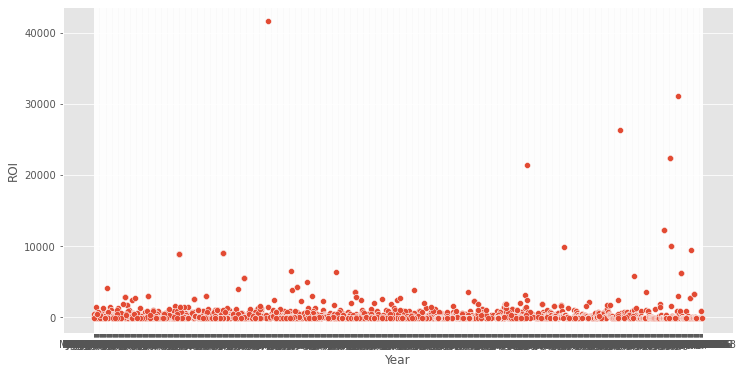

In [467]:
plt.figure(figsize=(12, 6))
# create a scatter plot of ROI by genre and year
sns.scatterplot(x='release_date', y='ROI', data=merged_df, alpha=1 )

# set the x-axis label to 'Year'
plt.xlabel('Year')

# set the y-axis label to 'ROI'
plt.ylabel('ROI')

# show the plot
plt.show()